<h1 span style="color:mediumvioletred;text-align:center;">Quantization</h1>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[369]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 113, 244, 195,   0,   0,   0,
          0,   0],
       [  

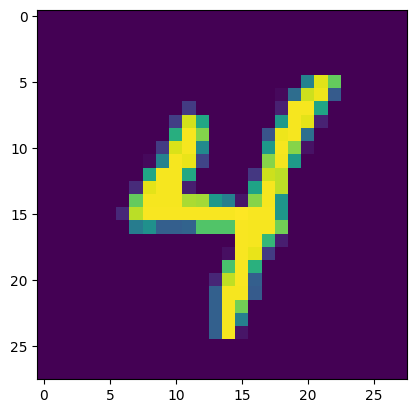

In [8]:
plt.imshow(X_train[369])

## Scalling

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Model Training

In [12]:
CNN = keras.Sequential([
    #Input
    keras.Input(shape=(28,28,1)),
    #CNN layers
    keras.layers.Conv2D(filters=80, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=50, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    #dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [13]:
CNN.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
CNN.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1454 - accuracy: 0.9557
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0474 - accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0315 - accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0257 - accuracy: 0.9917
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0194 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0145 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0133 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0107 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0099 - accuracy: 0.9967
Epoch 10/10
1875/1875 [==============================] - 26s 14m

In [15]:
CNN.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0445 - accuracy: 0.9897


[0.0445459708571434, 0.9897000193595886]

In [16]:
CNN.save("./quantization/saved_model")

INFO:tensorflow:Assets written to: ./quantization/saved_model\assets


INFO:tensorflow:Assets written to: ./quantization/saved_model\assets


## 1. Post Training Quantization

In [17]:
converter = tf.lite.TFLiteConverter.from_saved_model("./quantization/saved_model")
tflite_model = converter.convert()

In [18]:
len(tflite_model)

673820

In [19]:
converter = tf.lite.TFLiteConverter.from_saved_model("./quantization/saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [20]:
len(tflite_quant_model)

176544

#### Saving models

In [21]:
with open("./quantization/tflite_model.tflite", "wb") as f:
    f.write(tflite_model)
    
with open("./quantization/tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)

## 2. Quantization aware training

In [27]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model
quant_aware_model = quantize_model(CNN)

quant_aware_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

quant_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 28, 28, 1)        3         
 er)                                                             
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 26, 26, 80)       963       
 erV2)                                                           
                                                                 
 quant_max_pooling2d (Quanti  (None, 13, 13, 80)       1         
 zeWrapperV2)                                                    
                                                                 
 quant_conv2d_1 (QuantizeWra  (None, 11, 11, 50)       36153     
 pperV2)                                                         
                                                                 
 quant_max_pooling2d_1 (Quan  (None, 5, 5, 50)         1

In [28]:
quant_aware_model.fit(X_train, y_train, epochs=1)

1875/1875 [==============================] - 33s 17ms/step - loss: 0.0093 - accuracy: 0.9972


In [29]:
quant_aware_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0357 - accuracy: 0.9914


[0.035700369626283646, 0.9914000034332275]

In [30]:
converter = tf.lite.TFLiteConverter.from_keras_model(quant_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_aware_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\niloy\AppData\Local\Temp\tmpd1wq3k85\assets


INFO:tensorflow:Assets written to: C:\Users\niloy\AppData\Local\Temp\tmpd1wq3k85\assets
C:\Users\niloy\anaconda3\envs\tfenv\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [31]:
with open("./quantization/tflite_quant_aware_model.tflite", "wb") as f:
    f.write(tflite_quant_aware_model)